In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Image_Classification_Fashion


cnn_fashion_ubyte_model.h5  t10k-images-idx3-ubyte   train-labels-idx1-ubyte
fashion-mnist_test.csv	    t10k-labels-idx1-ubyte
fashion-mnist_train.csv     train-images-idx3-ubyte


Mounted at /content/drive
cnn_fashion_ubyte_model.h5  t10k-images-idx3-ubyte   train-labels-idx1-ubyte
fashion-mnist_test.csv	    t10k-labels-idx1-ubyte
fashion-mnist_train.csv     train-images-idx3-ubyte
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.7814 - loss: 0.6089 - val_accuracy: 0.8757 - val_loss: 0.3446
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.8875 - loss: 0.3057 - val_accuracy: 0.8874 - val_loss: 0.2983
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9038 - loss: 0.2559 - val_accuracy: 0.8986 - val_loss: 0.2829
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9194 - loss: 0.2164 - val_accuracy: 0.9049 - val_loss: 0.2567
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9290 - loss: 0.1912 - val_accuracy: 0.9029 - val_loss: 0.2555
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9385 - loss: 0.1671 - val_accuracy: 0.9103 - val_loss: 0.2535
Epo

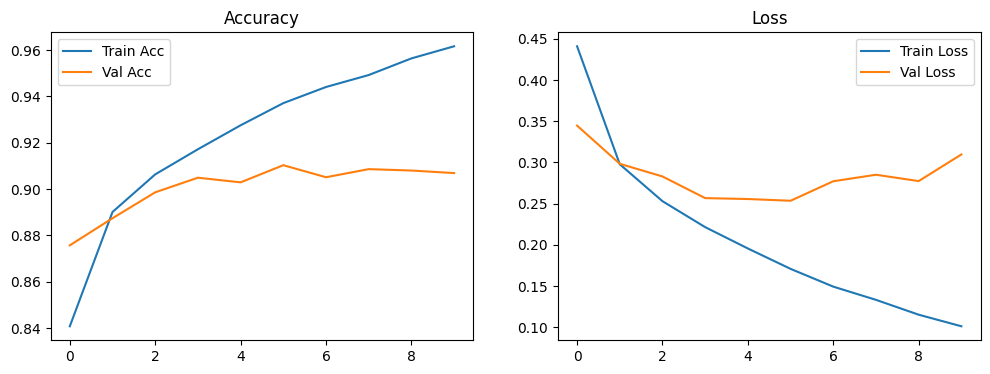

✅ Model saved to Google Drive successfully at:
/content/drive/MyDrive/Image_Classification_Fashion/cnn_fashion_ubyte_model.h5


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Check files in your folder
!ls /content/drive/MyDrive/Image_Classification_Fashion

import numpy as np
import struct
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import tensorflow as tf

# Base path to your dataset folder in Drive
base_path = '/content/drive/MyDrive/Image_Classification_Fashion'

# --- Load IDX files ---
def load_images(file_path):
    with open(file_path, 'rb') as f:
        _, num, rows, cols = struct.unpack('>IIII', f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(num, rows, cols)

def load_labels(file_path):
    with open(file_path, 'rb') as f:
        _, num = struct.unpack('>II', f.read(8))
        return np.frombuffer(f.read(), dtype=np.uint8)

# --- Load dataset from Drive ---
x_train = load_images(f'{base_path}/train-images-idx3-ubyte')
y_train = load_labels(f'{base_path}/train-labels-idx1-ubyte')
x_test  = load_images(f'{base_path}/t10k-images-idx3-ubyte')
y_test  = load_labels(f'{base_path}/t10k-labels-idx1-ubyte')

# --- Normalize and reshape ---
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# --- Build CNN model ---
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Train ---
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# --- Evaluate ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# --- Plot Accuracy & Loss ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()

# --- Save model to Drive ---
model.save(f'{base_path}/cnn_fashion_ubyte_model.h5')
print("✅ Model saved to Google Drive successfully at:")
print(f"{base_path}/cnn_fashion_ubyte_model.h5")

